In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def iterate(y_prev, h):
    y1 = y_prev[0]
    y2 = y_prev[1]
    z = -0.04 * y1 + 1e4 * y2 * (1 - y1 - y2)
    y1_new = y1 + h * z
    y2_new = y2 + h * (-z - 3e7 * y2**2)
    
    return y1_new, y2_new

In [ ]:
y1 = 1
y2 = 0

T = 10000
h = 0.0001
ts = np.arange(0, T, h)

y1s = np.zeros_like(ts)
y2s = np.zeros_like(ts)

y1s[0] = y1
y2s[0] = y2

for i in tqdm(range(1, len(ts))):
    y1, y2 = iterate((y1, y2), h)
    y1s[i] = y1
    y2s[i] = y2

  0%|          | 0/99999999 [00:00<?, ?it/s]

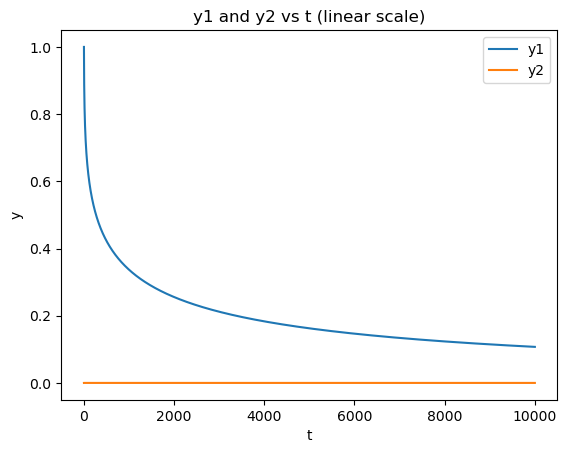

In [11]:
sampledy1s = y1s[::100]
sampledy2s = y2s[::100]
sampledts = ts[::100]
    
plt.plot(sampledts, sampledy1s, label='y1')
plt.plot(sampledts, sampledy2s, label='y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('y1 and y2 vs t (linear scale)')
plt.show()

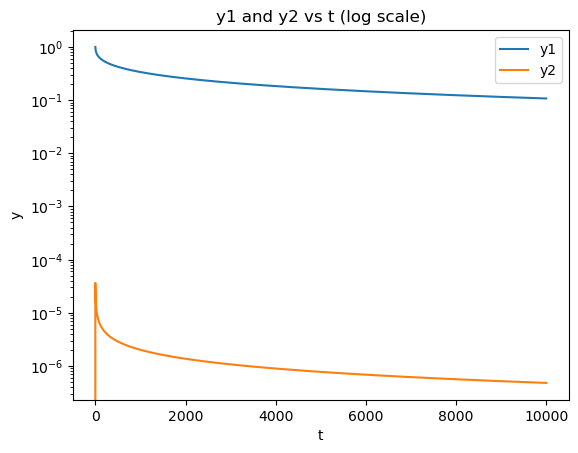

In [13]:
plt.plot(sampledts, sampledy1s, label='y1')
plt.plot(sampledts, sampledy2s, label='y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.yscale('log')
plt.title('y1 and y2 vs t (log scale)')
plt.show()